### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [1]:
import pandas as pd

In [2]:
pd.__version__

'2.0.3'

In [3]:
import ads

C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
ads.__version__

'2.8.10'

# Aula 2 - Conhecendo os dados

## Aula 2.1 - Carregando o arquivo

In [5]:
pd.read_csv('framingham.csv')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


Clique [aqui](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression?select=framingham.csv) para acessar a base de dados

In [6]:
dados = pd.read_csv('framingham.csv')

In [7]:
dados.shape

(4240, 16)

In [8]:
dados.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
dados.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 2.2 Usando o Oracle ADS para importar os dados

In [10]:
import ads

In [11]:
from ads.dataset.factory import DatasetFactory

In [12]:
ds = DatasetFactory.open('framingham.csv')

In [13]:
type(ds)

ads.dataset.dataset.ADSDataset

In [14]:
type(dados)

pandas.core.frame.DataFrame

In [15]:
ds = DatasetFactory.open('framingham.csv', target='TenYearCHD')

In [16]:
type(ds)

ads.dataset.classification_dataset.BinaryClassificationDataset

In [79]:
ds

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py", line 223, in catch_format_error
    try:
         
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py", line 344, in __call__
    if method is not None:
               ^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\common\decorator\runtime_dependency.py", line 168, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\common\decorator\runtime_dependency.py", 

BinaryClassificationDataset(target: risco_DAC_decada) 4,090 rows, 16 columns

In [80]:
dict_eng_port = {
                 'male': 'sexo',
                 'age': 'idade',
                 'education': 'escolaridade',
                 'currentSmoker': 'fumante',
                 'cigsPerDay': 'cigarros_por_dia',                 
                 'BPMeds': 'uso_medicamento_pressao',
                 'prevalentStroke': 'AVC',
                 'prevalentHyp': 'hipertensao',
                 'diabetes': 'diabetes',
                 'totChol': 'colesterol_total',
                 'sysBP': 'pressao_arterial_sistolica',
                 'diaBP': 'pressao_arterial_diastolica',
                 'BMI': 'IMC',
                 'heartRate': 'freq_cardiaca',
                 'glucose': 'glicemia',
                 'TenYearCHD': 'risco_DAC_decada'
}

In [81]:
ds =ds.rename_columns(columns=dict_eng_port)

In [82]:
ds.columns

Index(['sexo', 'idade', 'fumante', 'cigarros_por_dia',
       'uso_medicamento_pressao', 'AVC', 'hipertensao', 'diabetes',
       'colesterol_total', 'pressao_arterial_sistolica',
       'pressao_arterial_diastolica', 'IMC', 'freq_cardiaca', 'glicemia',
       'risco_DAC_decada', 'fumante_categorico'],
      dtype='object')

In [83]:
ds.head()

,sexo,idade,fumante,cigarros_por_dia,uso_medicamento_pressao,AVC,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,IMC,freq_cardiaca,glicemia,risco_DAC_decada,fumante_categorico
0,1,39,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0
1,0,46,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0
2,1,48,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,2
3,0,61,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,3
4,0,46,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,3


In [84]:
ds = ds.drop_columns('escolaridade')

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
  File "C:\Users\medei\AppData\Local\Temp\ipykernel_16604\3109548238.py", line 1, in <module>
    ds = ds.drop_columns('escolaridade')
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\dataset\dataset.py", line 659, in drop_columns
    self._validate_feature(columns)
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\dataset\dataset.py", line 1343, in _validate_feature
    self._handle_key_error(feature)
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfr

In [85]:
ds.columns

Index(['sexo', 'idade', 'fumante', 'cigarros_por_dia',
       'uso_medicamento_pressao', 'AVC', 'hipertensao', 'diabetes',
       'colesterol_total', 'pressao_arterial_sistolica',
       'pressao_arterial_diastolica', 'IMC', 'freq_cardiaca', 'glicemia',
       'risco_DAC_decada', 'fumante_categorico'],
      dtype='object')

## Aula 2.3 - Trabalhando com um ADS DataFrame

Clique [aqui](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression?select=framingham.csv) para acessar a base de dados

In [86]:
ds

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py", line 223, in catch_format_error
    try:
         
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py", line 344, in __call__
    if method is not None:
               ^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\common\decorator\runtime_dependency.py", line 168, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\common\decorator\runtime_dependency.py", 

BinaryClassificationDataset(target: risco_DAC_decada) 4,090 rows, 16 columns

In [87]:
ds.summary()

,Feature,Datatype
0,risco_DAC_decada,categorical/int64
1,sexo,categorical/int64
2,idade,ordinal/int64
3,fumante,categorical/int64
4,cigarros_por_dia,ordinal/int64
5,uso_medicamento_pressao,categorical/int64
6,AVC,categorical/int64
7,hipertensao,categorical/int64
8,diabetes,categorical/int64
9,colesterol_total,ordinal/float64


In [88]:
ds.astype(types={'cigarros_por_dia':'int64'})

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py", line 223, in catch_format_error
    try:
         
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py", line 344, in __call__
    if method is not None:
               ^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\common\decorator\runtime_dependency.py", line 168, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\common\decorator\runtime_dependency.py", 

BinaryClassificationDataset(target: risco_DAC_decada) 4,090 rows, 16 columns

In [89]:
ds.cigarros_por_dia.unique()

array([ 0, 20, 30, 23, 15,  9, 10,  5, 35, 43,  1, 40,  3,  2, 12,  4, 18,
       60, 25, 14, 45,  8, 50, 13, 11,  7,  6, 38, 29, 17, 16, 19, 70],
      dtype=int64)

In [90]:
ds.isnull().sum()

sexo                           0
idade                          0
fumante                        0
cigarros_por_dia               0
uso_medicamento_pressao        0
AVC                            0
hipertensao                    0
diabetes                       0
colesterol_total               0
pressao_arterial_sistolica     0
pressao_arterial_diastolica    0
IMC                            0
freq_cardiaca                  0
glicemia                       0
risco_DAC_decada               0
fumante_categorico             0
dtype: int64

In [91]:
selecao_corretos = ds.cigarros_por_dia.notnull()

In [92]:
ds = ds[selecao_corretos]

In [93]:
ds.isnull().sum()

sexo                           0
idade                          0
fumante                        0
cigarros_por_dia               0
uso_medicamento_pressao        0
AVC                            0
hipertensao                    0
diabetes                       0
colesterol_total               0
pressao_arterial_sistolica     0
pressao_arterial_diastolica    0
IMC                            0
freq_cardiaca                  0
glicemia                       0
risco_DAC_decada               0
fumante_categorico             0
dtype: int64

In [94]:
ds = ds[ds.uso_medicamento_pressao.notnull()]
ds = ds[ds.colesterol_total.notnull()]
ds = ds[ds.IMC.notnull()]
ds = ds[ds.freq_cardiaca.notnull()]

In [95]:
ds.isnull().sum()

sexo                           0
idade                          0
fumante                        0
cigarros_por_dia               0
uso_medicamento_pressao        0
AVC                            0
hipertensao                    0
diabetes                       0
colesterol_total               0
pressao_arterial_sistolica     0
pressao_arterial_diastolica    0
IMC                            0
freq_cardiaca                  0
glicemia                       0
risco_DAC_decada               0
fumante_categorico             0
dtype: int64

![glicemia.png](attachment:b50dc537-4579-4063-838b-74a1699efe13.png)

## Aula 2.4 - Trabalhando com Dados Faltantes

In [96]:
pessoas_com_diabetes = ds[ds.diabetes == 1]

In [97]:
pessoas_sem_diabetes = ds[ds.diabetes ==0]

In [98]:
pessoas_com_diabetes.glicemia.head()

37    225.0
44    215.0
56     55.0
66    202.0
96    126.0
Name: glicemia, dtype: float64

In [99]:
pessoas_com_diabetes.glicemia.mean()

168.17884615384614

In [100]:
pessoas_sem_diabetes.glicemia.mean()

79.62157551430005

In [101]:
ds.glicemia.describe()

count    4090.000000
mean       81.873399
std        22.870845
min        40.000000
25%        72.000000
50%        79.000000
75%        85.000000
max       394.000000
Name: glicemia, dtype: float64

In [102]:
ds.diabetes.value_counts()

diabetes
0    3986
1     104
Name: count, dtype: int64

In [103]:
import seaborn as sns

(0.0, 400.0)

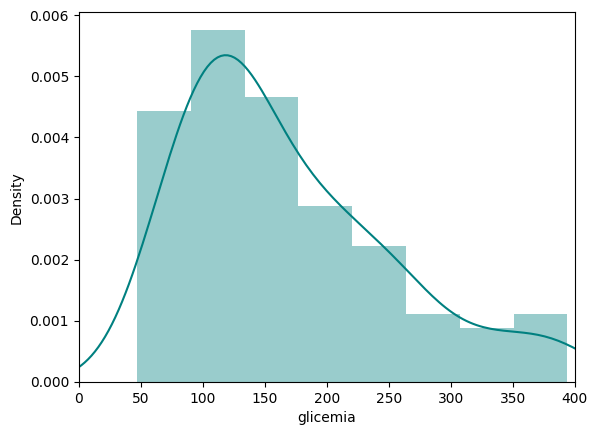

In [104]:
ax = sns.distplot(pessoas_com_diabetes.glicemia, norm_hist=False)
ax.set_xlim(0,400)

(0.0, 400.0)

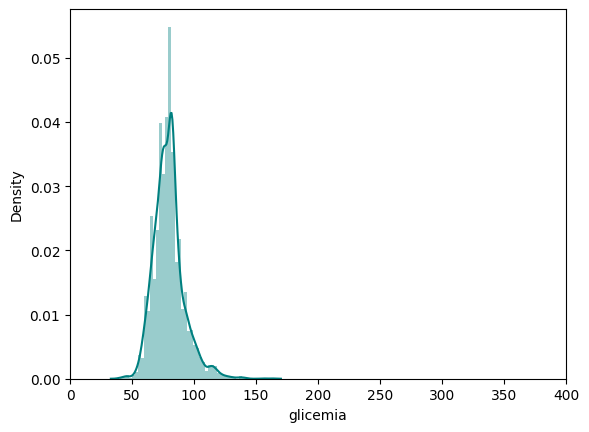

In [105]:
ax = sns.distplot(pessoas_sem_diabetes.glicemia, norm_hist=False)
ax.set_xlim(0,400)

In [106]:
nulos = ds.glicemia.isnull()

In [107]:
ds[nulos].diabetes.value_counts()

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
  File "C:\Users\medei\AppData\Local\Temp\ipykernel_16604\3457897255.py", line 1, in <module>
    ds[nulos].diabetes.value_counts()
    ~~^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\dataset\dataset.py", line 1174, in __getitem__
    return self._build_new_dataset(self.df[key])
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\dataset\dataset.py", line 1306, in _build_new_dataset
    new_ds = get_dataset(
             ^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packag

In [108]:
ds.glicemia.mean()

81.87339853300733

In [109]:
ds.fillna({'glicemia': 81.8}, inplace = True)

In [110]:
ds.isnull().sum()

sexo                           0
idade                          0
fumante                        0
cigarros_por_dia               0
uso_medicamento_pressao        0
AVC                            0
hipertensao                    0
diabetes                       0
colesterol_total               0
pressao_arterial_sistolica     0
pressao_arterial_diastolica    0
IMC                            0
freq_cardiaca                  0
glicemia                       0
risco_DAC_decada               0
fumante_categorico             0
dtype: int64

# Aula 3 - Trabalhando com os Dados


## Aula 3.1 - Preparando os dados


In [111]:
ds.summary()

,Feature,Datatype
0,risco_DAC_decada,categorical/int64
1,sexo,categorical/int64
2,idade,ordinal/int64
3,fumante,categorical/int64
4,cigarros_por_dia,ordinal/int64
5,uso_medicamento_pressao,categorical/int64
6,AVC,categorical/int64
7,hipertensao,categorical/int64
8,diabetes,categorical/int64
9,colesterol_total,ordinal/float64


In [112]:
ds = ds.astype(types={'cigarros_por_dia':'int64'})

In [113]:
ds = ds.astype(types={'uso_medicamento_pressao':'int64'})

In [114]:
ds.summary()

,Feature,Datatype
0,risco_DAC_decada,categorical/int64
1,sexo,categorical/int64
2,idade,ordinal/int64
3,fumante,categorical/int64
4,cigarros_por_dia,ordinal/int64
5,uso_medicamento_pressao,ordinal/int64
6,AVC,categorical/int64
7,hipertensao,categorical/int64
8,diabetes,categorical/int64
9,colesterol_total,ordinal/float64


In [115]:
ds.head()

,sexo,idade,fumante,cigarros_por_dia,uso_medicamento_pressao,AVC,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,IMC,freq_cardiaca,glicemia,risco_DAC_decada,fumante_categorico
0,1,39,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0
1,0,46,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0
2,1,48,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,2
3,0,61,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,3
4,0,46,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,3


## Aula 3.2 - Executando Transformações

In [116]:
ds.cigarros_por_dia.describe()

count    4090.000000
mean        8.995355
std        11.913388
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigarros_por_dia, dtype: float64

(0.0, 70.0)

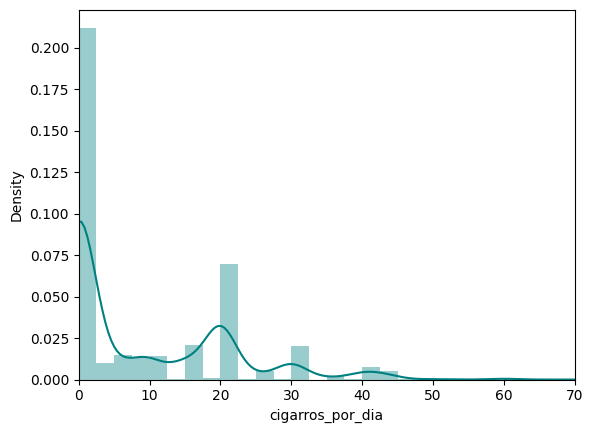

In [117]:
ax = sns.distplot(ds.cigarros_por_dia, norm_hist=False)
ax.set_xlim(0,70)

In [118]:
ds.fumante.value_counts()

fumante
0    2085
1    2005
Name: count, dtype: int64

<Axes: ylabel='cigarros_por_dia'>

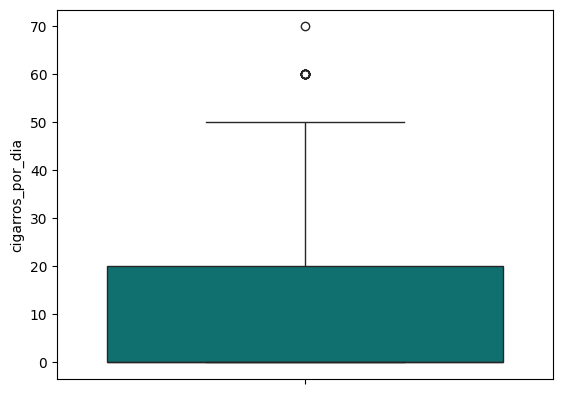

In [119]:
sns.boxplot(ds.cigarros_por_dia)

In [120]:
ds.cigarros_por_dia.mean()

8.995354523227384

0 - não fumante
1 - fumante leve (1 até 10)
2 - fumante moderado (11 até 20)
3 - fumante severo (+ de 20 cigarros)

In [121]:
limites = [-1, 1, 11,20, 71]

In [122]:
categorias = [0,1,2,3]

In [123]:
fumante_categorico = pd.cut(ds.cigarros_por_dia, limites, labels=categorias)

In [124]:
fumante_categorico

0       0
1       0
2       2
3       3
4       3
       ..
4234    3
4236    2
4237    0
4238    0
4239    3
Name: cigarros_por_dia, Length: 4090, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [125]:
ds = ds.assign_column('fumante_categorico', fumante_categorico)

In [126]:
ds.columns

Index(['sexo', 'idade', 'fumante', 'cigarros_por_dia',
       'uso_medicamento_pressao', 'AVC', 'hipertensao', 'diabetes',
       'colesterol_total', 'pressao_arterial_sistolica',
       'pressao_arterial_diastolica', 'IMC', 'freq_cardiaca', 'glicemia',
       'risco_DAC_decada', 'fumante_categorico'],
      dtype='object')

In [127]:
ds.head()

,sexo,idade,fumante,cigarros_por_dia,uso_medicamento_pressao,AVC,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,IMC,freq_cardiaca,glicemia,risco_DAC_decada,fumante_categorico
0,1,39,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0
1,0,46,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0
2,1,48,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,2
3,0,61,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,3
4,0,46,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,3


## Aula 3.3 - Visualizando dados com Oracle ADS

In [128]:
ds.show_in_notebook()

Accordion(children=(HTML(value='<h3>Type: BinaryClassificationDataset</h3><h3>4,090 Rows, 16 Columns</h3><h4>C…

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
  File "C:\Users\medei\AppData\Local\Temp\ipykernel_16604\2876128834.py", line 1, in <module>
    ds.show_in_notebook()
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\common\decorator\runtime_dependency.py", line 168, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\common\decorator\runtime_dependency.py", line 168, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoun

In [130]:
ds.target.show_in_notebook()

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\style\core.py", line 137, in use
    style = _rc_params_in_file(style)
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\__init__.py", line 879, in _rc_params_in_file
    with _open_file_or_url(fname) as fd:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\__init__.py", line 856, in _open_file_or_url
    with open(fname, encoding='u

## Aula 3.4 - Mais visualizações 

In [131]:
ds.plot('glicemia')

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\style\core.py", line 137, in use
    style = _rc_params_in_file(style)
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\__init__.py", line 879, in _rc_params_in_file
    with _open_file_or_url(fname) as fd:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\__init__.py", line 856, in _open_file_or_url
    with open(fname, encoding='u

In [132]:
ds.plot('diabetes')

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\style\core.py", line 137, in use
    style = _rc_params_in_file(style)
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\__init__.py", line 879, in _rc_params_in_file
    with _open_file_or_url(fname) as fd:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\__init__.py", line 856, in _open_file_or_url
    with open(fname, encoding='u

In [133]:
ds.plot('glicemia', 'diabetes')

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\style\core.py", line 137, in use
    style = _rc_params_in_file(style)
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\__init__.py", line 879, in _rc_params_in_file
    with _open_file_or_url(fname) as fd:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\__init__.py", line 856, in _open_file_or_url
    with open(fname, encoding='u

In [134]:
ds.plot('fumante_categorico', 'AVC')

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\style\core.py", line 137, in use
    style = _rc_params_in_file(style)
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\__init__.py", line 879, in _rc_params_in_file
    with _open_file_or_url(fname) as fd:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\__init__.py", line 856, in _open_file_or_url
    with open(fname, encoding='u

In [135]:
sns.pairplot(ds)

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
  File "C:\Users\medei\AppData\Local\Temp\ipykernel_16604\4241061444.py", line 1, in <module>
    sns.pairplot(ds)
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py", line 2103, in pairplot
    raise TypeError(
TypeError: 'data' must be pandas DataFrame object, not: <class 'ads.dataset.classification_dataset.BinaryClassificationDataset'>
TypeError: 'data' must be pandas DataFrame object, not: <class 'ads.dataset.classification_dataset.BinaryClassificationDataset'>

In [136]:
pandas_ds = ds.to_pandas()

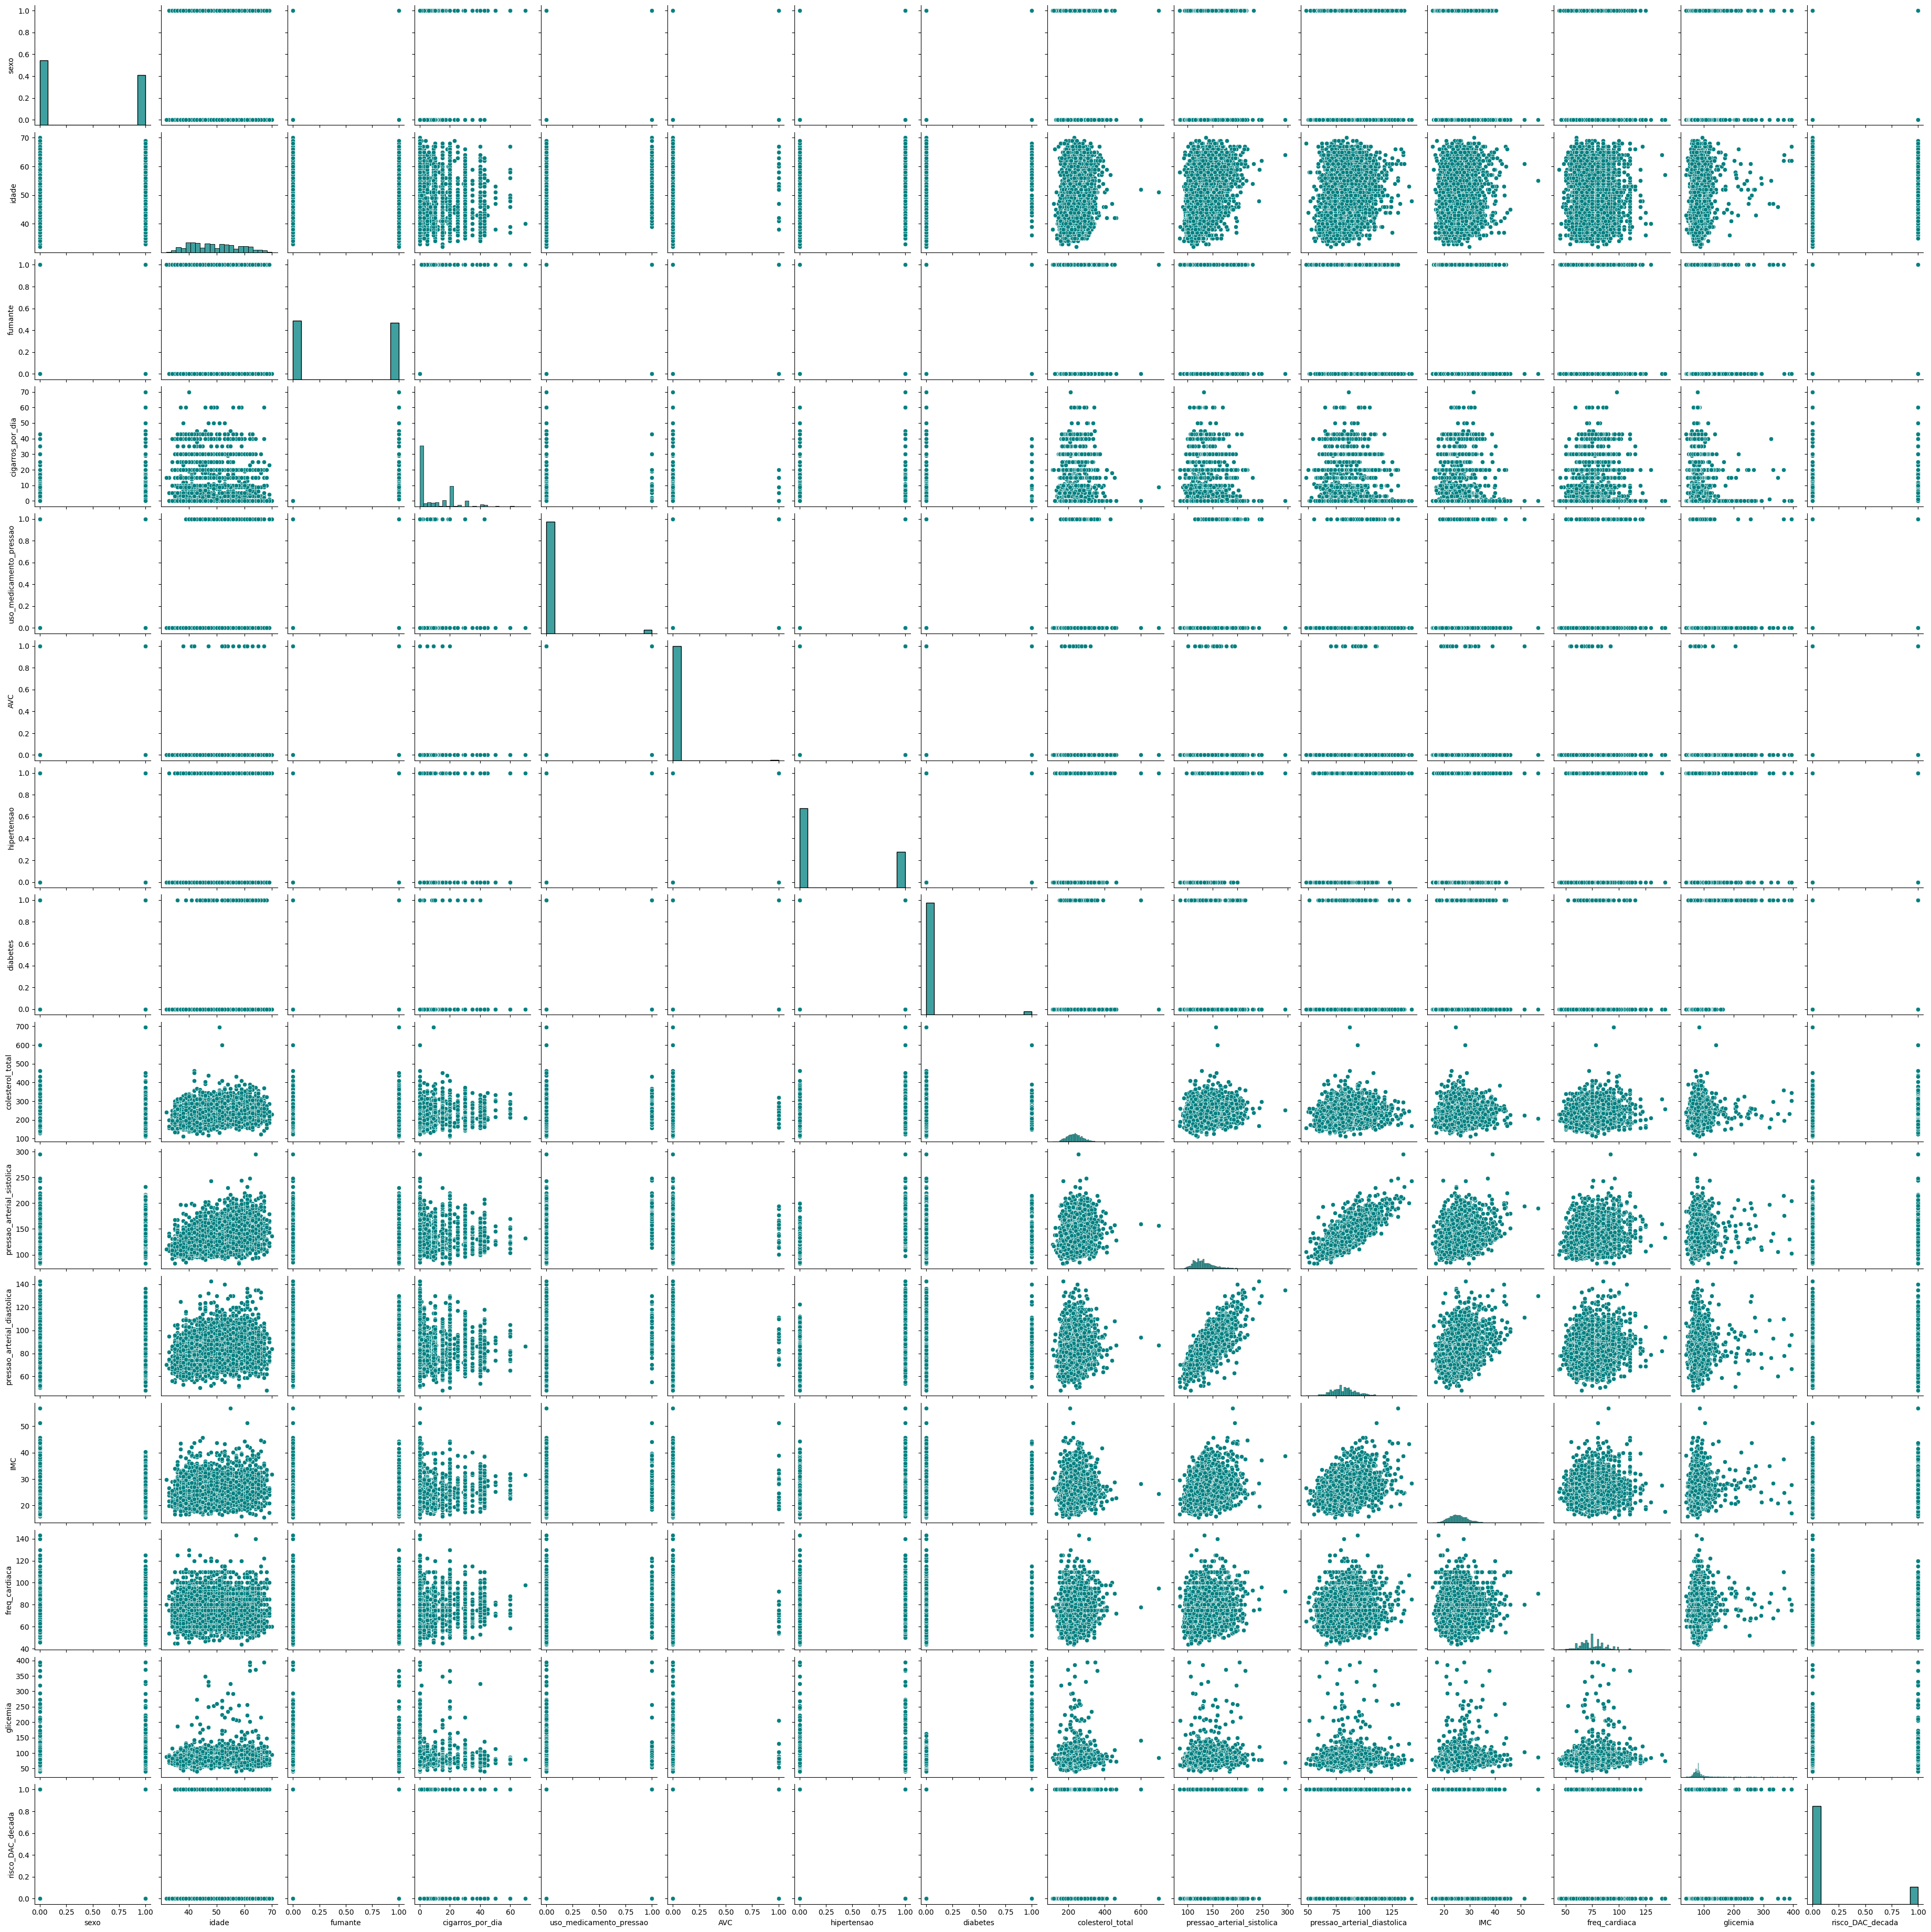

In [137]:
sns.pairplot(pandas_ds)

In [139]:
ds.suggest_recommendations()

Code
Message                                                       Variables                  Suggested                        Action                                                                          
Strongly correlated with pressao_arterial_diastolica(78.46%.) pressao_arterial_sistolica Drop pressao_arterial_diastolica Drop pressao_arterial_sistolica    .drop_columns(["pressao_arterial_sistolica"])
                                                                                                                          Drop pressao_arterial_diastolica  .drop_columns(["pressao_arterial_diastolica"])
                                                                                                                          Do nothing                                                                      
Imbalanced Target(17.56%)                                     risco_DAC_decada           Up-sample                        Do nothing                                                                      
                                                                                                                          Down-sample                                                       .down_sample()
                                                                                                                          Up-sample                                          .up_sample(sampler='default')

<Axes: >

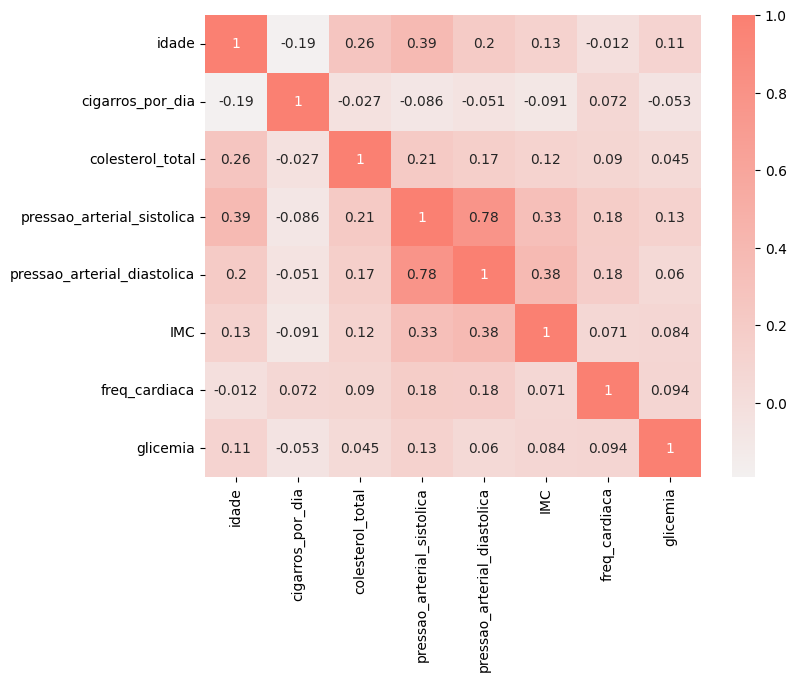

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
paleta = sns.color_palette('light:salmon', as_cmap=True)
sns.heatmap(ds.corr(), annot=True, cmap=paleta)

In [144]:
ds.suggest_recommendations()

Code
Message                                                       Variables                  Suggested                        Action                                                                          
Strongly correlated with pressao_arterial_diastolica(78.46%.) pressao_arterial_sistolica Drop pressao_arterial_diastolica Drop pressao_arterial_sistolica    .drop_columns(["pressao_arterial_sistolica"])
                                                                                                                          Drop pressao_arterial_diastolica  .drop_columns(["pressao_arterial_diastolica"])
                                                                                                                          Do nothing                                                                      
Imbalanced Target(17.56%)                                     risco_DAC_decada           Up-sample                        Do nothing                                                                      
                                                                                                                          Down-sample                                                       .down_sample()
                                                                                                                          Up-sample                                          .up_sample(sampler='default')

In [145]:
base_original = base_original.auto_transform()

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
  File "C:\Users\medei\AppData\Local\Temp\ipykernel_16604\296072473.py", line 1, in <module>
    base_original = base_original.auto_transform()
                    ^^^^^^^^^^^^^
NameError: name 'base_original' is not defined
NameError: name 'base_original' is not defined

In [146]:
base_original=DatasetFactory.open('framingham.csv', target='TenYearCHD')

In [147]:
base_original.suggest_recommendations()

Code
Message                                 Variables  Suggested                         Action                                                                
Contains missing values(105)            education  Fill missing values with frequent Drop                                      .drop_columns(["education"])
                                                                                     Fill missing values with frequent          .fillna({"education": 1.0})
                                                                                     Fill missing values with constant   .fillna({"education": "constant"})
                                                                                     Do nothing                                                            
Contains missing values(29)             cigsPerDay Fill missing values with frequent Drop                                     .drop_columns(["cigsPerDay"])
                                                                                     Fill missing values with frequent         .fillna({"cigsPerDay": 0.0})
                                                                                     Fill missing values with constant  .fillna({"cigsPerDay": "constant"})
                                                                                     Do nothing                                                            
Contains missing values(53)             BPMeds     Fill missing values with frequent Drop                                         .drop_columns(["BPMeds"])
                                                                                     Fill missing values with frequent             .fillna({"BPMeds": 0.0})
                                                                                     Fill missing values with constant      .fillna({"BPMeds": "constant"})
                                                                                     Do nothing                                                            
Contains missing values(50)             totChol    Fill missing values with frequent Drop                                        .drop_columns(["totChol"])
                                                                                     Fill missing values with frequent          .fillna({"totChol": 240.0})
                                                                                     Fill missing values with constant     .fillna({"totChol": "constant"})
                                                                                     Do nothing                                                            
Contains missing values(19)             BMI        Fill missing values with mean     Drop                                            .drop_columns(["BMI"])
                                                                                     Fill missing values with mean                .fillna({"BMI": 25.8008})
                                                                                     Fill missing values with median                 .fillna({"BMI": 25.4})
                                                                                     Fill missing values with frequent              .fillna({"BMI": 22.19})
                                                                                     Fill missing values with constant         .fillna({"BMI": "constant"})
                                                                                     Do nothing                                                            
Contains missing values(1)              heartRate  Fill missing values with frequent Drop                                      .drop_columns(["heartRate"])
                                                                                     Fill missing values with frequent         .fillna({"heartRate": 75.0})
                                                                                     Fill missi

In [148]:
base_original = base_original.auto_transform()

In [149]:
base_original.show_in_notebook()

Accordion(children=(HTML(value='<h3>Type: BinaryClassificationDataset</h3><h3>7,192 Rows, 15 Columns</h3><h4>C…

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
  File "C:\Users\medei\AppData\Local\Temp\ipykernel_16604\2865068843.py", line 1, in <module>
    base_original.show_in_notebook()
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\common\decorator\runtime_dependency.py", line 168, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ads\common\decorator\runtime_dependency.py", line 168, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\medei\AppData\Local\Packages\PythonS